# Exploration_SSAC 07 닮은 연예인 찾기

* Keyword : Vector space, Image Embedding, L1 / L2 distance, Triplet Loss, PCA / T-SNE (시각화 분석 방법론)

##### Vector space  
다수의 벡터(크기와 방향을 가지는 물리량 - Real Number)가 있고, 이 벡터들이 모여 하나의 공간을 형성하는 것. 아무 벡터나 허용되는 것이 아니고, 한 공간 상에 존재하는 벡터들은 서로가 서로에게 더해질 수 있고, 임의의 숫자가 각각에 곱해져서 각 벡터의 길이가 늘어날 수도 있다. 

##### Embedding  
고차원의 Vector Space의 정보를 저차원으로 변환하면서 필요한 정보를 보존하는 것  

##### L1 / L2  Distance   
L1 : 두 개의 벡터를 빼고, 절대값을 취한 뒤, 합한 것  
L2 : 두 개의 벡터의 각 원소를 빼고, 제곱하고, 합치고, 루트를 씌운 것 (쉽게 말해, 두 개 벡터/점 사이의 직선거리로 계산)

##### Project Process  
1) 비교할 이미지 데이터 수집  
* 개인 사진  
* 연예인 사진   

2) dlib 라이브러리 활용하여 face region 추출  
3) 임베딩 추출  
4) 연예인 사진과의 벡터 간의 거리 비교  
5) 다양한 시각화 도전

##### 필요한 모듈 import

In [31]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from urllib.parse import quote_plus
import face_recognition
from PIL import Image
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1) 데이터 수집

* selenium / chromeDriver 이용하여 이미지 크롤링   
* 여자 연예인 / 남자 연예인 모두 수집

In [2]:
baseUrl = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
plusUrl = input('검색어 입력: ') 
crawl_num = int(input('크롤링할 갯수 입력(최대 50개): '))
 
url = baseUrl + quote_plus(plusUrl) # 한글 검색 자동 변환
html = urlopen(url)
soup = bs(html, "html.parser")
img = soup.find_all(class_='_img')
 
n = 1
for i in img:
    print(n)
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open('./images/img' + str(n)+'.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)
    n += 1
    if n > crawl_num:
        break
    
    
print('Image Crawling is done.')


검색어 입력: 여자 연예인
크롤링할 갯수 입력(최대 50개): 50
Image Crawling is done.


## 2) Face Recognition Region 추출

##### 저장된 이미지 중 한 장 face region 추출 확인

[(201, 468, 468, 200)]


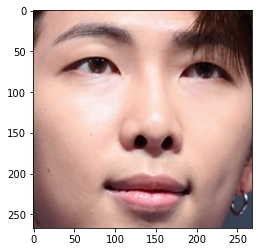

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/RM.jpg'
# face_recognition 라이브러리의 load_image_file / face_locations 함수 활용
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

# 좌표를 중심으로 한 face 추출
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   

##### 상단의 코드를 기반으로 get_cropped_face 함수 정의

In [4]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # 저장된 사진 중 얼굴 인식이 되지 않은 사진이 오류없이 진행되기 위해서 빈 리스트로 return 시킴
    if len(face_locations) == 0:
        return []
    else:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c, d:b, :]
        return cropped_face

* 함수 적용 확인

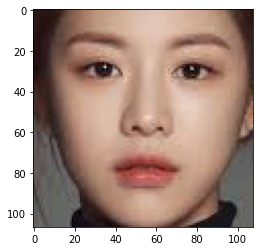

In [17]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/고윤정.jpeg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [83]:
# dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
# file_list = os.listdir(dir_path)
# path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/cropped'

# for file in file_list:
#     image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/'+file
#     face = get_cropped_face(image_path)
#     pillow_image = Image.fromarray(face)
#     pillow_image.save(file)

## 3) 이미지 임베딩 추출

* def get_face_embedding(face)   
* def get_face_embedding_dict(dir_path)  

In [18]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['잇지유나.jpg', '이형철.jpeg', '유퉁.jpeg', '이희준.jpg', '설리.jpg', '슬기.jpg', '카이.jpg', '김정훈.jpeg', '레드벨벳웬디.jpg', '류승범.jpg', '이태성.jpeg', '잭 스페이더.jpeg', '크리스탈.jpg', '이대근.jpeg', '이연희.jpg', '임원희.jpeg', '이유진.jpeg', '고수.jpeg', '이석준.jpeg', '권나라.jpg', '이재백.jpeg', '조이.jpg', '슈가.jpg', 'b1a4진영.jpeg', '이규한.jpeg', '이태리.jpeg', '김동희.jpeg', '이준혁.jpeg', '잇지예지.jpeg', '오한결.jpeg', '김민교.jpeg', 'RM.jpg', '대도서관.jpeg', '유노윤호.jpeg', '임하룡.jpeg', '공형진.jpeg', '오재원.jpg', '김다현.jpeg', '곽정욱.jpeg', 'obama.jpg', '안재홍.jpeg', '유민규.jpeg', '강지환.jpeg', '이세진.jpeg', '오상훈.jpeg', '엄기준.jpeg', '크리스 햄스워스.jpg', '이연걸.jpeg', '정형돈.jpg', '오승윤.jpeg', '이재황.jpeg', '길.jpg', '쯔위.jpg', '김민재.jpeg', '강경준.jpeg', '유아.jpg', '한소희.jpg', '김준한.jpeg', '차두리.jpeg', '여욱환.jpeg', '이정신.jpeg', '제프리 힌턴.jpg', '제이콥 배털론.jpg', '시우민.jpg', '양세종.png', '김강우.jpeg', '김현중.jpeg', '스윙스.jpeg', '곽도원.jpeg', '유지태.jpg', '우도환.jpeg', '마크 러팔로.jpeg', '윤균상.jpeg', '강성진.jpeg', '신동엽.jpg', '이광수.jpg', '강성민.jpeg', 'clinton.jpeg', '켄 정.jpeg', '저스틴 존슨.jpeg', '김C.jpeg', '강이석.png', '장도연.jpg

In [19]:
image_file = os.path.join(dir_path, '잇지유나.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.0631528 ,  0.05623492, -0.05842839, -0.10113522, -0.12261771,
        -0.03782561, -0.10749254, -0.07724184,  0.17748788, -0.18057215,
         0.12327425, -0.09684219, -0.17207819, -0.02540074, -0.03670691,
         0.22279269, -0.18953314, -0.19640492,  0.02003684,  0.00788311,
         0.12937436, -0.0173677 , -0.07122888,  0.1035078 , -0.14168853,
        -0.24213286, -0.13270064, -0.06226437, -0.046878  , -0.1179975 ,
        -0.01063012,  0.06451053, -0.15634516,  0.00363216,  0.03289947,
         0.12083868,  0.03747343, -0.06655563,  0.13932531,  0.01629415,
        -0.28168768,  0.01975621,  0.13404146,  0.23033662,  0.11034711,
         0.07544077, -0.04262162, -0.11544963,  0.12220149, -0.1724067 ,
        -0.00518629,  0.12908618,  0.07976022,  0.07147324,  0.01769349,
        -0.11663077,  0.12906022,  0.12260395, -0.23805557,  0.00827908,
         0.11163129, -0.07589737,  0.00715668, -0.09547719,  0.25715384,
         0.10375375, -0.08898594, -0.20563185,  0.1

In [22]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0: continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
        embedding = get_face_embedding(face)
        if len(embedding) > 0 :
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [23]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['이동욱']

array([-1.12973467e-01,  1.32398412e-01,  9.41103697e-02, -2.09610611e-02,
       -2.89646443e-02,  4.97481562e-02, -9.52420905e-02, -8.74103308e-02,
        9.26373452e-02, -1.24026164e-01,  2.92428821e-01, -2.00010631e-02,
       -2.53615677e-01, -4.23164666e-02, -1.20419022e-02,  1.12445958e-01,
       -9.04754028e-02, -1.45030364e-01, -2.71215010e-02,  2.72694118e-02,
        1.19153105e-01,  4.59852219e-02,  1.25065502e-02,  1.14487447e-02,
       -1.65074795e-01, -2.88559020e-01, -7.88057148e-02, -8.08683783e-02,
       -5.90163469e-02, -4.04489115e-02, -4.44493890e-02, -2.94550173e-02,
       -2.11955637e-01,  6.26612455e-04,  2.32980028e-02,  1.32611811e-01,
       -1.04314219e-02, -1.81642771e-02,  1.72931626e-01,  7.87987094e-03,
       -2.12054968e-01,  4.15276028e-02,  4.01437841e-02,  2.25683615e-01,
        1.37398377e-01,  4.96614613e-02,  1.50431404e-02, -1.86839223e-01,
        9.58956555e-02, -2.15447798e-01,  1.92667335e-01,  1.27301082e-01,
        1.50458112e-01,  

In [24]:
face_locations

[(201, 468, 468, 200)]

## 4) 이미지 간의 벡터 거리 비교

* def get_distance()

In [33]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('시우민', '이동욱')

0.5633237588384855

In [41]:
get_distance('시우민', '강동원')

0.47080522221804644

## 5) 나와 가장 닮은 연예인 찾기   

:: 나의 사진에서 cropped_face된 사진과의 이미지 간 벡터 거리가 가장 짧은, 가까운 연예인이 닮았다고 정의함.   

##### 활용 함수
* def get_cropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수    
* def get_face_embedding(face) : 얼굴 영역으로부터 얼굴 임베딩 벡터를 구하는 함수   
* def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수   
* def get_distance(name1, name2) : 두 이미지 (cropped_face) 사이의 임베딩 벡터 거리를 구하는 함수  

In [74]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('이시은02')

In [70]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('이시은01',
  array([-0.07745789,  0.05621864,  0.09961909, -0.08406806, -0.10827726,
          0.01420167, -0.06409591, -0.08809255,  0.14164841, -0.18102282,
          0.20949052, -0.09577964, -0.24745101, -0.01387453, -0.07447074,
          0.22319871, -0.17184441, -0.11604034, -0.02212799, -0.01437869,
          0.0970435 ,  0.05774453, -0.00554167,  0.03047943, -0.11947185,
         -0.32126689, -0.07792042, -0.0042347 , -0.08189977, -0.08143771,
         -0.07139374,  0.07499082, -0.17838992,  0.02255823,  0.00542455,
          0.15189074, -0.06136521, -0.06492767,  0.13510078, -0.00050916,
         -0.258948  ,  0.05780267,  0.05698996,  0.23276347,  0.13682933,
         -0.00672738, -0.01118841, -0.14043695,  0.11094078, -0.20840865,
          0.03421946,  0.17460221,  0.02995205,  0.07243024,  0.01993515,
         -0.07904598,  0.01217309,  0.14215487, -0.01569995, -0.00719816,
          0.12974514, -0.07843232,  0.00870351, -0.12603186,  0.17511296,
          0.03668205, -0.10

In [75]:
def get_nearest_face(name, top=5):
    sort_ket_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [72]:
get_nearest_face('이시은01')

순위 1 : 이름(이시은02), 거리(0.2903669163875498)
순위 2 : 이름(아이유), 거리(0.3061375348836283)
순위 3 : 이름(태연), 거리(0.3401818140341342)
순위 4 : 이름(지호), 거리(0.3594543300450326)
순위 5 : 이름(서현진), 거리(0.3690739489747881)


In [76]:
get_nearest_face('이시은02')

순위 1 : 이름(이시은01), 거리(0.2903669163875498)
순위 2 : 이름(강미나), 거리(0.3496541828665847)
순위 3 : 이름(오재무), 거리(0.3518108936559975)
순위 4 : 이름(태연), 거리(0.36413864246934835)
순위 5 : 이름(우기), 거리(0.3646029771170099)


## Result of Project  

다양한 라이브러리를 활용하여 **이미지에서 얼굴을 인식하고 (dlib)** , 인식되 사진의 임베딩 과정을 거쳐서 서로 비교하여 닮은 정도를 알아내는 과정에서 **L2 Normalization, Embedding vector, Triplet Loss** 의 개념을 학습하였다.   

간단해 보이지만, 각 사진들을 수집하고, 전처리하여 정제하는 과정에서 예외처리를 해야 하는 알고리즘이 필요했다.   

각 이미지를 임베딩하여 벡터화를 한 다음, 그 이미지를 활용하여 거리도 구하고, Loss도 구하여 이미지 데이터의 분석이 가능했다.

## Good   

이미지를 수집하고, 데이터를 정제하는 과정에서 알고리즘을 고민하는 시간을 가졌다.  
L2 Distance에 대한 학습으로 임베딩되고, 벡터화된 이미지를 어떻게 비교하는지 학습하였다.  


## Difficulties / Challenges

cropped된 이미지를 저장하는 과정에서 PIL 라이브러리 활용 미숙으로 따로 save하지 못해서 데이터 distance 간의 거리를 시각화하는 과정을 시도해 보지 못했다.   

각 단계에서 활용된 함수 정의에 대한 코드를 분석하여 직접 다시 구성해보는 것도 좋겠다.